In [1]:
%pylab inline
import numpy as np
import torch
import os

from torch import nn
from torch import optim
from torch.nn import functional as F
from torch import autograd
from torch.autograd import Variable
import nibabel as nib
from torch.utils.data.dataset import Dataset
from torch.utils.data import dataloader
from skimage.transform import resize
from nilearn import plotting
from ADNI_dataset import *
from BRATS_dataset import *
from ATLAS_dataset import *
from Model_VAEGAN import *
from utils import *

Populating the interactive namespace from numpy and matplotlib


# Configuration

In [2]:
BATCH_SIZE=4
max_epoch = 100
gpu = True
workers = 4

reg = 5e-10

gamma = 20
beta = 10

Use_BRATS=False
Use_ATLAS = False

#setting latent variable sizes
latent_dim = 1000

device = 'cuda:1'

In [3]:
trainset = ADNIdataset(augmentation=True)
train_loader = torch.utils.data.DataLoader(trainset,batch_size=BATCH_SIZE,
                                          shuffle=True,num_workers=workers)
# if Use_BRATS:
#     #'flair' or 't2' or 't1ce'
#     trainset = BRATSdataset(imgtype='flair')
#     train_loader = torch.utils.data.DataLoader(trainset,batch_size = BATCH_SIZE, shuffle=True,
#                                                num_workers=workers)
# if Use_ATLAS:
#     trainset = ATLASdataset(augmentation=True)
#     train_loader = torch.utils.data.DataLoader(trainset,batch_size=BATCH_SIZE,
#                                           shuffle=True,num_workers=workers)

In [4]:
G = Generator(noise = latent_dim)
D = Discriminator()
E = Encoder()

G.cuda()
D.cuda()
E.cuda()

Encoder(
  (conv1): Conv3d(1, 64, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
  (conv2): Conv3d(64, 128, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
  (bn2): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv3d(128, 256, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
  (bn3): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv3d(256, 512, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
  (bn4): BatchNorm3d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (mean): Sequential(
    (0): Linear(in_features=32768, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=2048, out_features=1000, bias=True)
  )
  (logvar): Sequential(
    (0): Linear(in_features=32768, out_features=2048, bias=True)
    (1): BatchNorm1d(2

In [5]:
g_optimizer = optim.Adam(G.parameters(), lr=0.0001)
d_optimizer = optim.Adam(D.parameters(), lr=0.0001)
e_optimizer = optim.Adam(E.parameters(), lr = 0.0001)

# Training

In [6]:
N_EPOCH = 100

real_y = Variable(torch.ones((BATCH_SIZE, 1)).cuda())
fake_y = Variable(torch.zeros((BATCH_SIZE, 1)).cuda())
criterion_bce = nn.BCELoss()
criterion_l1 = nn.L1Loss()


# load the highest savepoints of all models
df = load_loss()
init_epoch = vae_load_checkpoint(G, D, E)

/usr/local/miniconda3/lib/python3.7/site-packages/torch/nn/functional.py:2351: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/miniconda3/lib/python3.7/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/miniconda3/lib/python3.7/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[43/100] D: 2.98e-08 En: 0.0834   De: 0.153   


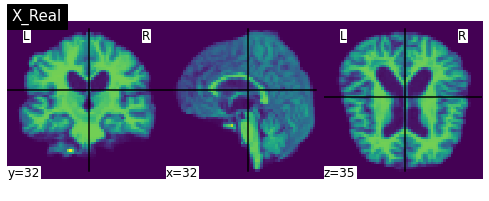

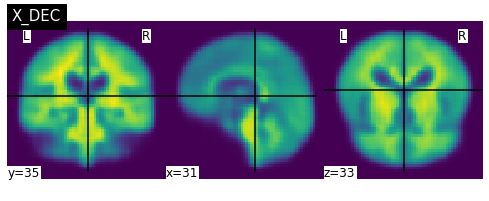

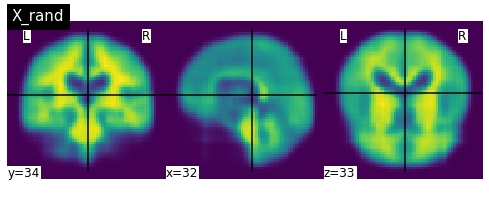

[43/100] D: 0.956    En: 0.2      De: 0.144   


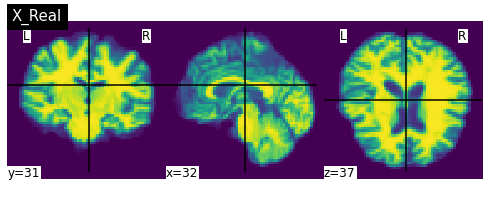

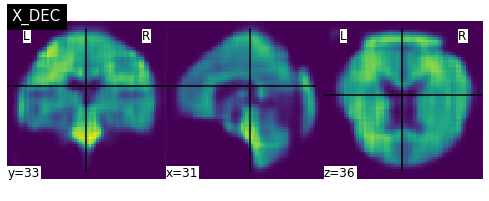

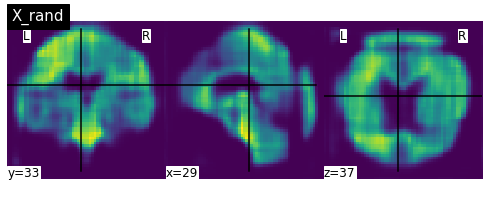

[43/100] D: 0.00198  En: 0.115    De: 0.206   


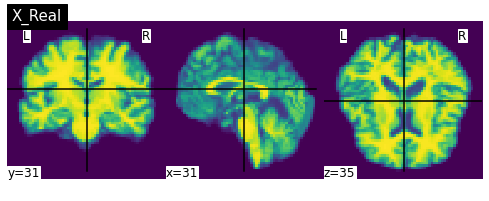

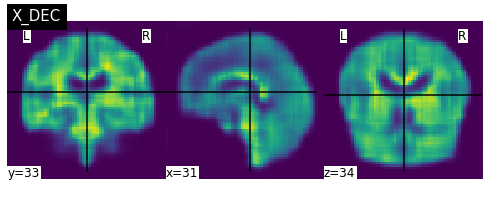

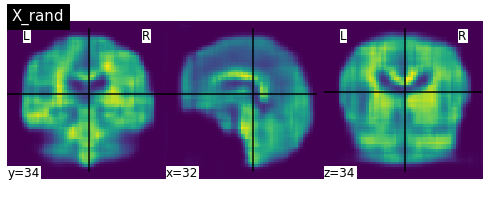

G loss: 0.16961222887039185
[44/100] D: 0.000916 En: 0.0869   De: 0.16    


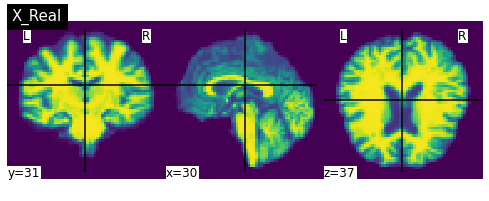

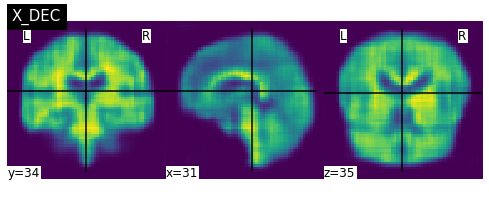

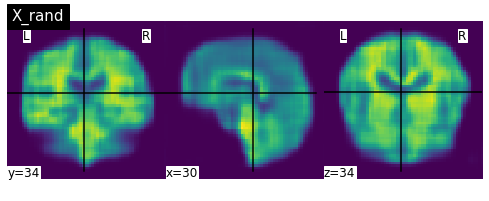

[44/100] D: 0.000459 En: 0.0905   De: 0.164   


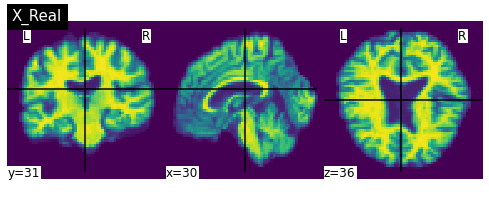

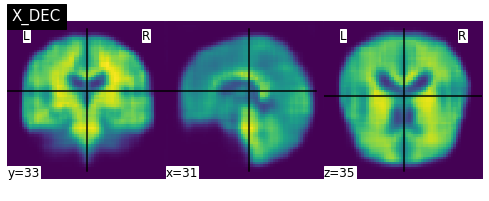

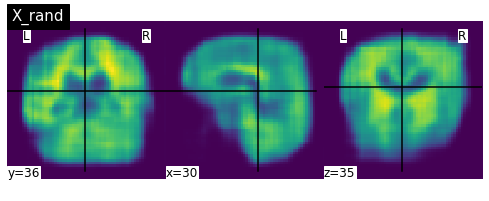

[44/100] D: 0.000332 En: 0.0805   De: 0.147   


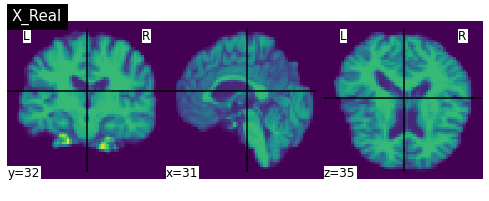

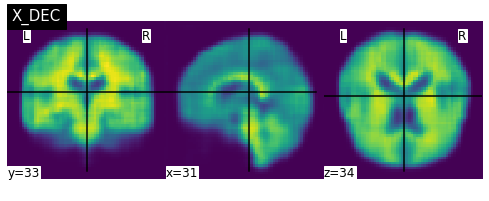

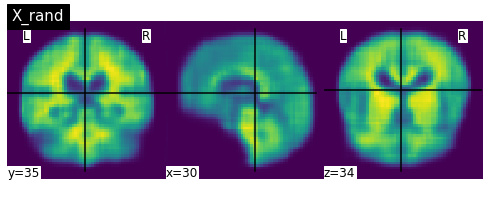

G loss: 0.11247442662715912
[45/100] D: 0.000298 En: 0.0821   De: 0.148   


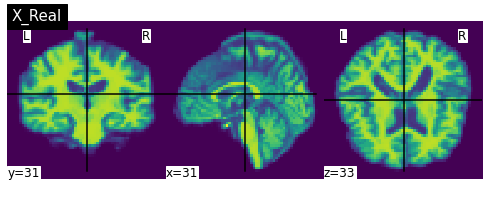

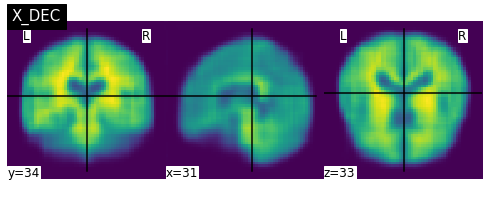

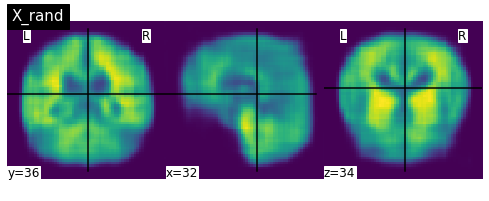

[45/100] D: 0.000147 En: 0.106    De: 0.195   


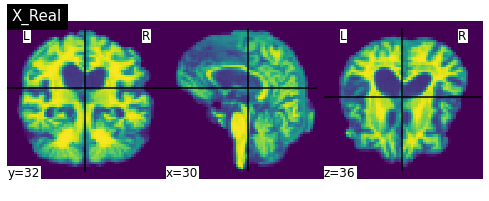

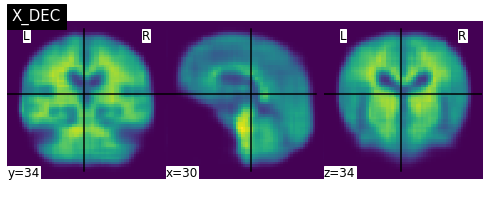

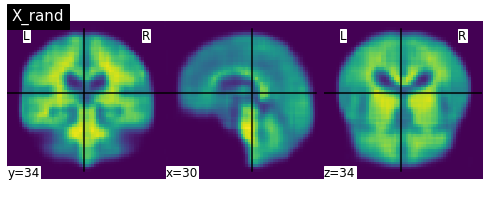

[45/100] D: 5.7e-05  En: 0.111    De: 0.209   


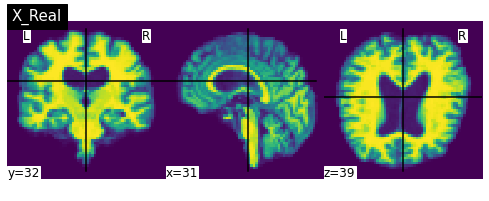

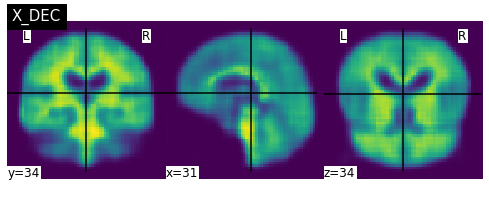

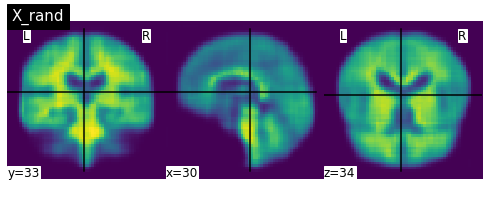

G loss: 0.14162208139896393
[46/100] D: 0.000239 En: 0.0709   De: 0.121   


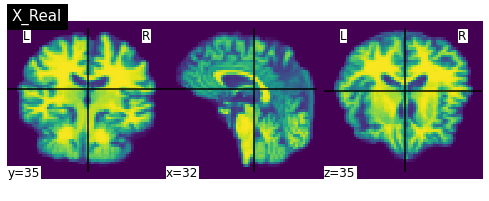

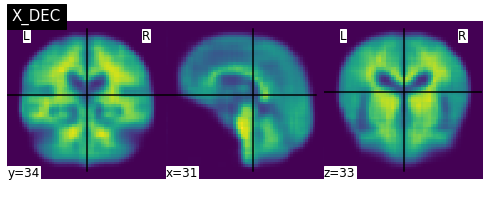

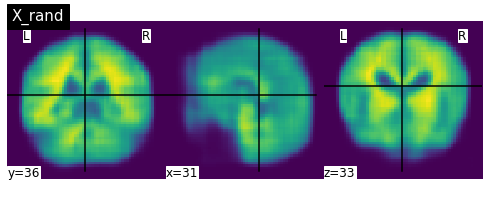

[46/100] D: 4.22e-05 En: 0.0758   De: 0.14    


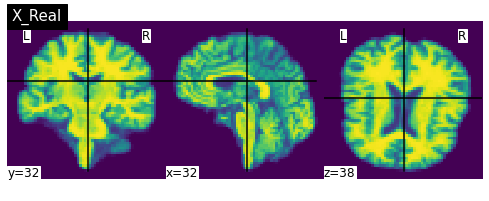

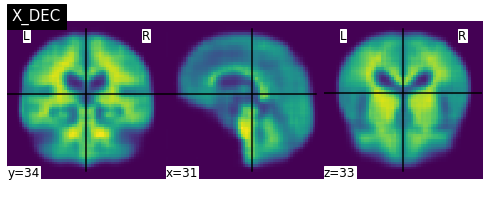

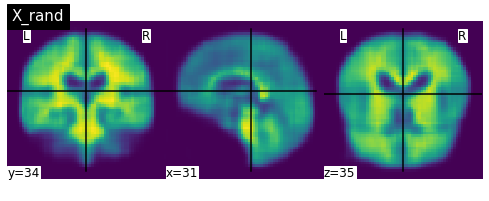

[46/100] D: 6.11e-05 En: 0.085    De: 0.157   


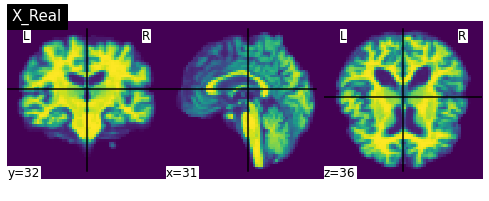

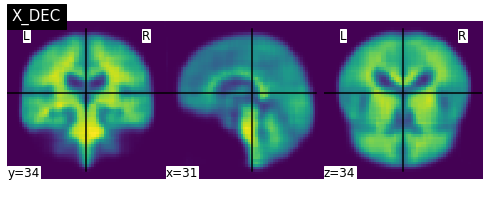

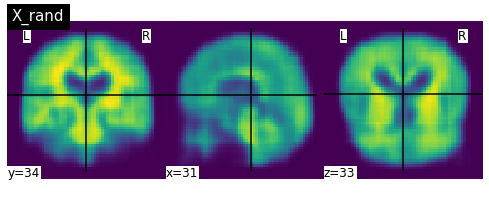

G loss: 0.12723517417907715
[47/100] D: 4.99e-05 En: 0.0769   De: 0.136   


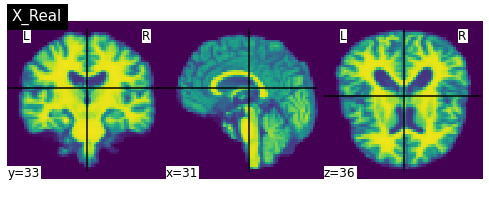

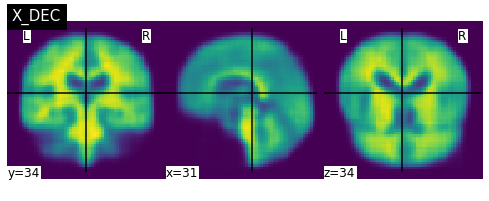

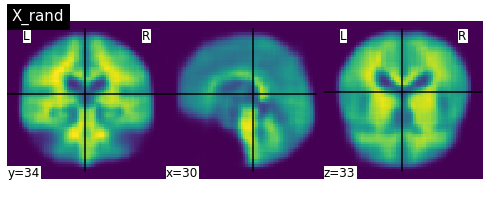

[47/100] D: 5.39e-05 En: 0.0807   De: 0.15    


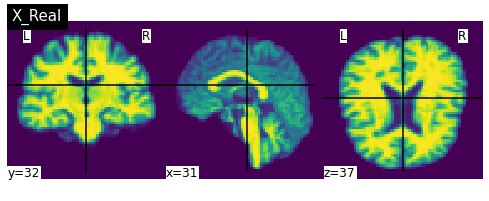

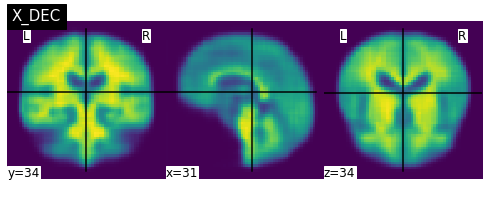

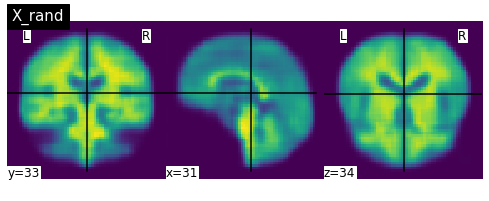

[47/100] D: 0.000378 En: 0.102    De: 0.184   


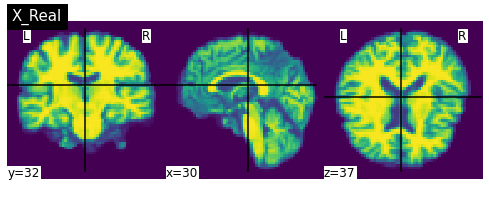

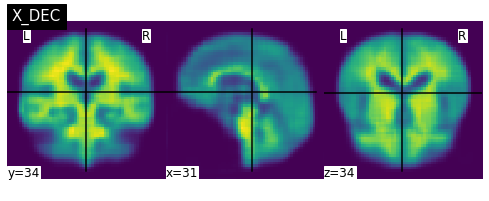

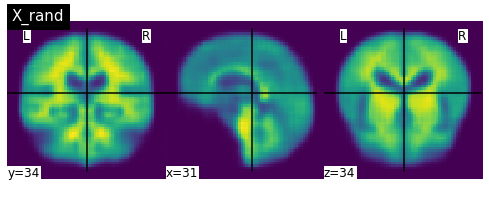

G loss: 0.18190573155879974
[48/100] D: 3.94e-05 En: 0.0897   De: 0.163   


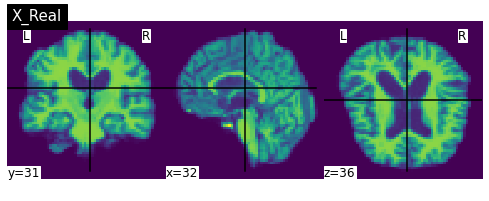

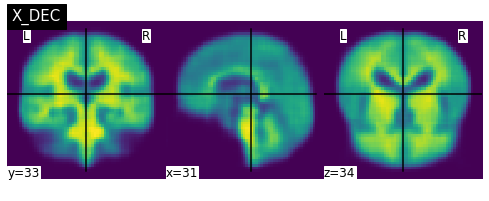

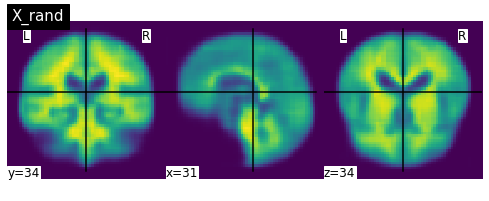

[48/100] D: 5.51e-05 En: 0.0869   De: 0.16    


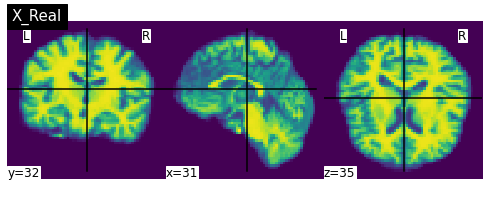

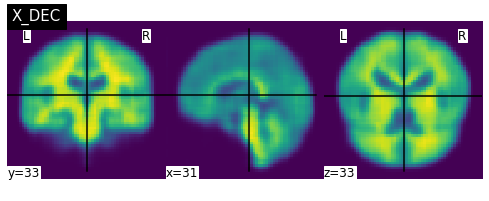

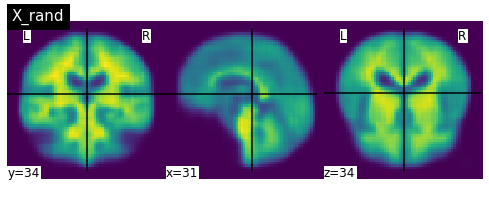

[48/100] D: 2.78e-05 En: 0.106    De: 0.198   


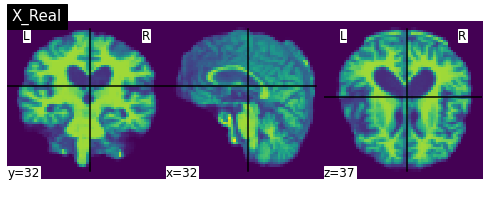

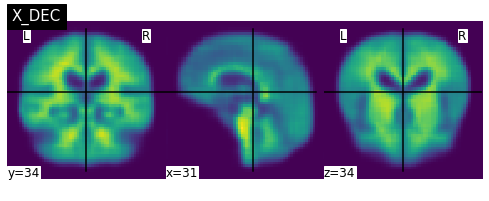

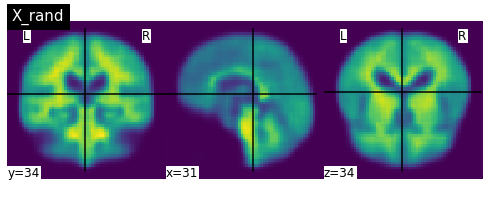

G loss: 0.12419543415307999
[49/100] D: 5.08e-05 En: 0.105    De: 0.196   


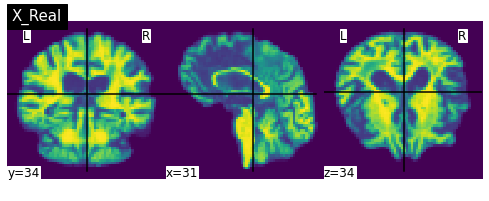

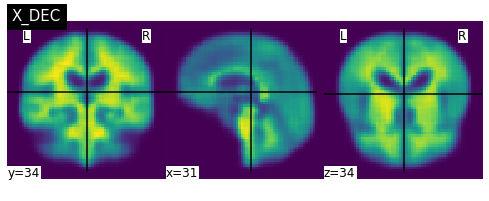

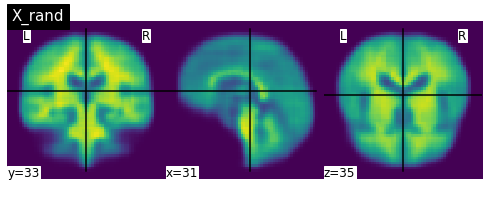

[49/100] D: 2.93e-05 En: 0.0937   De: 0.172   


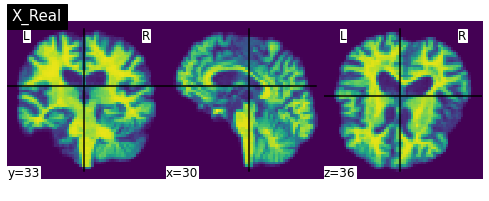

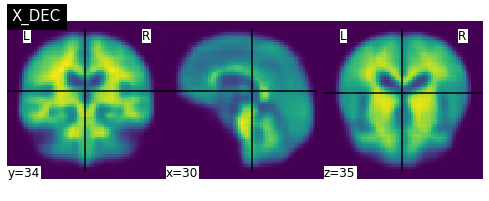

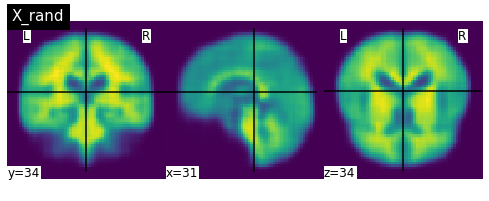

[49/100] D: 2.15e-05 En: 0.102    De: 0.191   


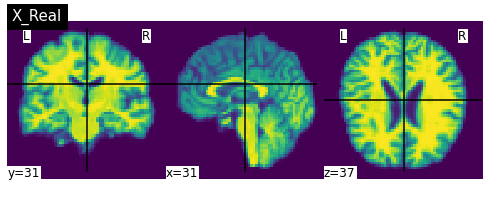

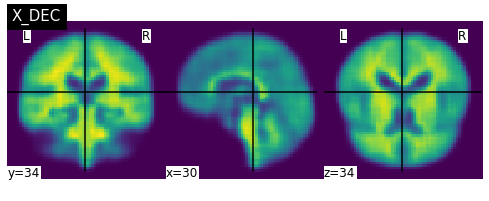

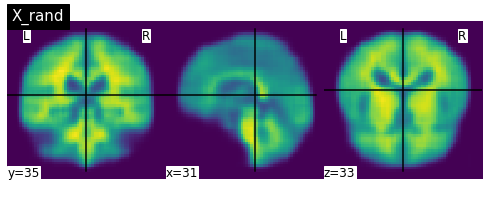

G loss: 0.13326407968997955
[50/100] D: 2.93e-05 En: 0.0784   De: 0.142   


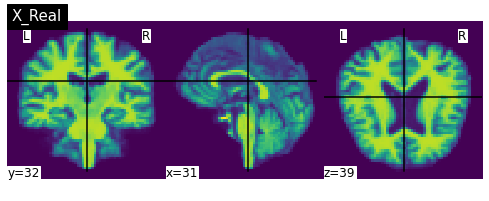

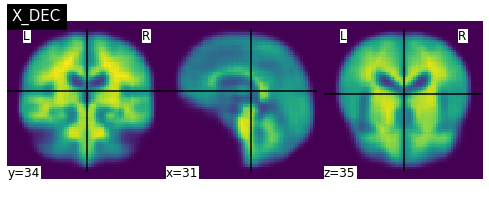

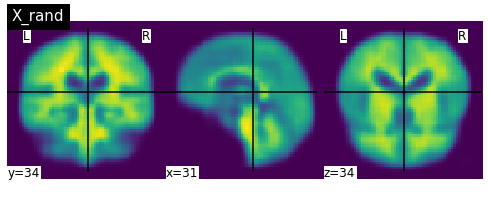

[50/100] D: 4.08e-05 En: 0.0798   De: 0.145   


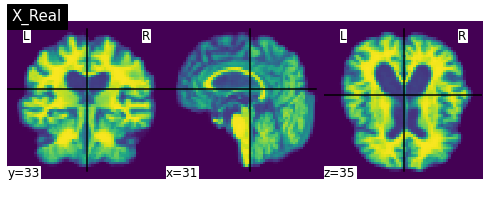

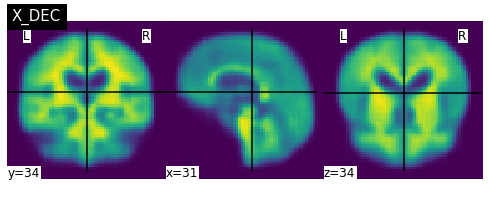

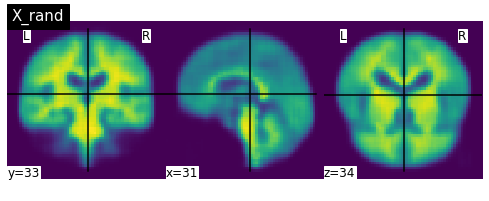

[50/100] D: 1.49e-05 En: 0.11     De: 0.209   


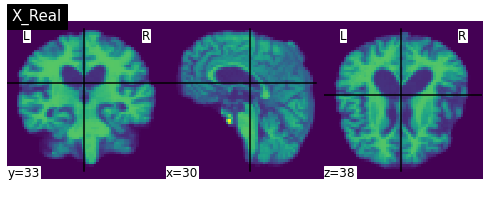

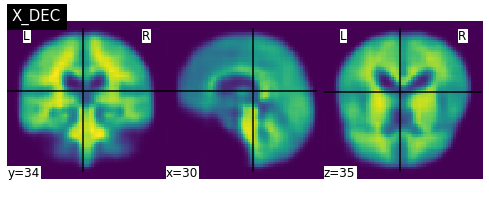

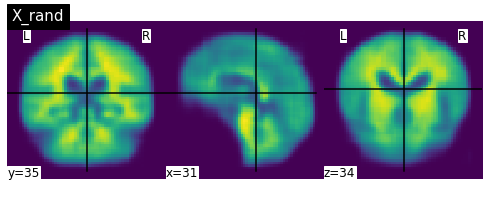

G loss: 0.12966622412204742
[51/100] D: 2.84e-05 En: 0.0837   De: 0.154   


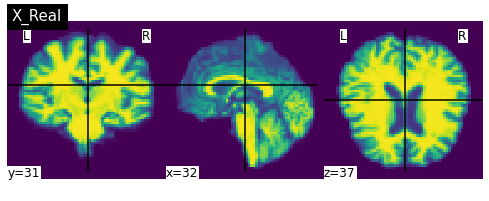

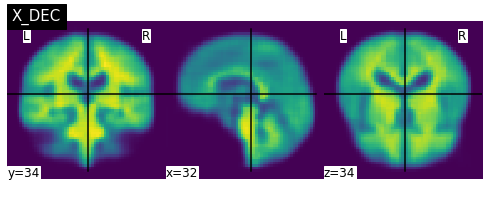

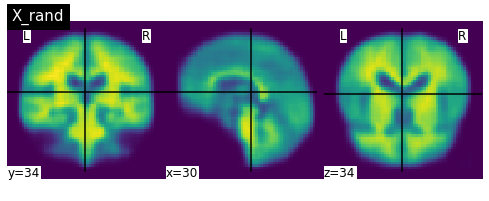

[51/100] D: 0.000106 En: 0.0905   De: 0.164   


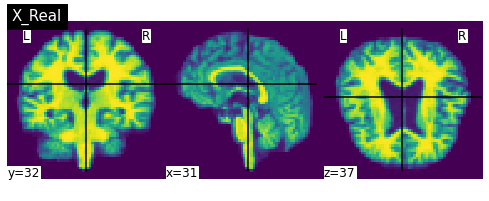

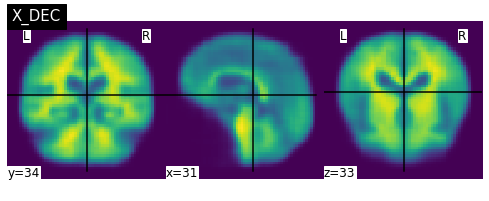

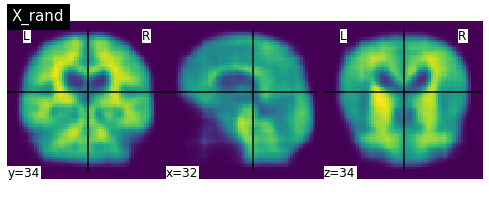

[51/100] D: 1.52e-05 En: 0.102    De: 0.19    


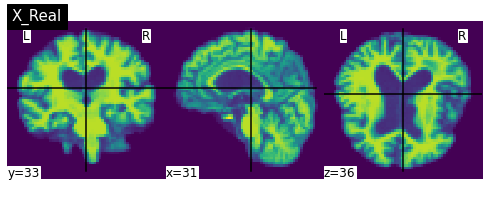

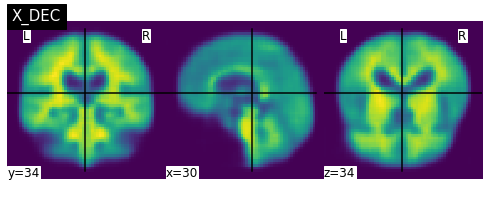

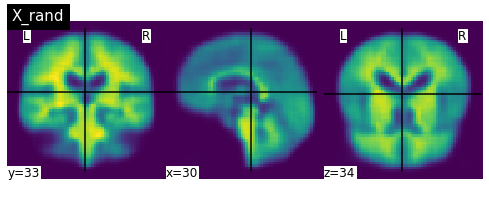

G loss: 0.17844514548778534
[52/100] D: 8.58e-06 En: 0.0938   De: 0.176   


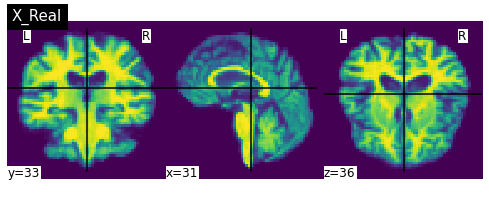

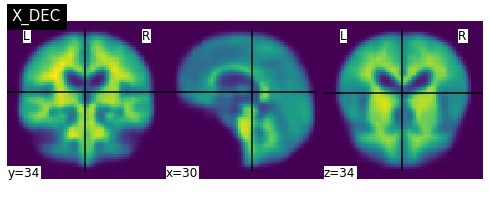

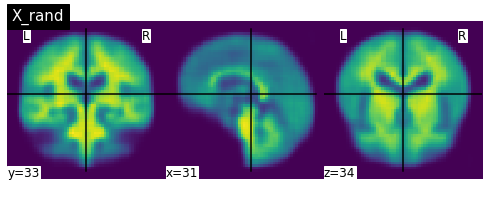

[52/100] D: 2.19e-05 En: 0.0763   De: 0.137   


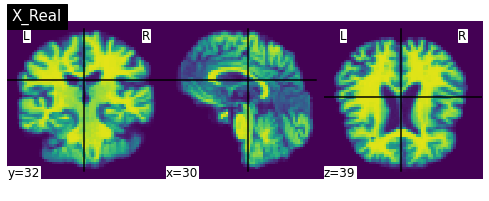

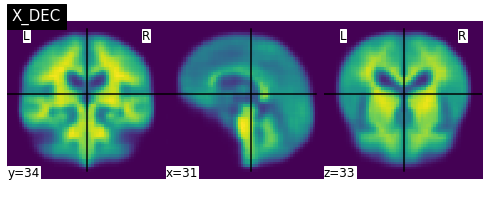

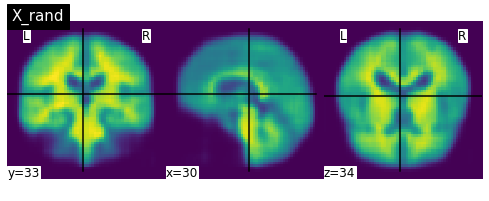

[52/100] D: 8.02e-06 En: 0.0897   De: 0.163   


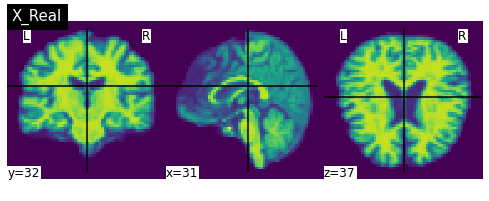

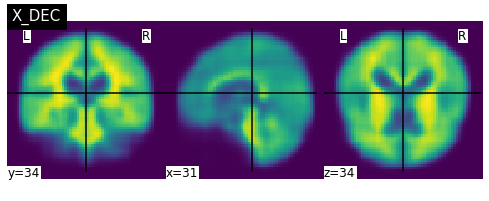

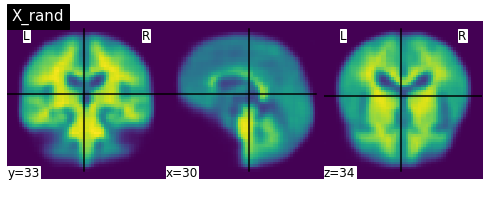

G loss: 0.1247008889913559
[53/100] D: 8.24e-06 En: 0.0942   De: 0.176   


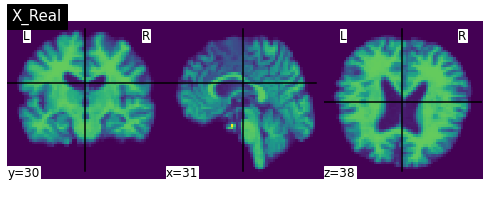

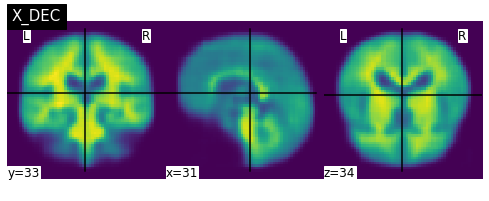

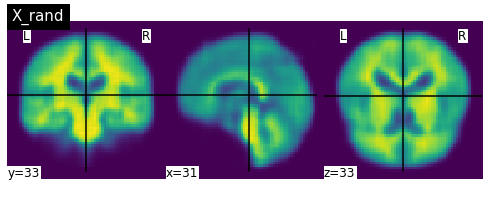

In [ ]:
if not os.path.exists('./checkpoint'):
    os.mkdir('./checkpoint')

for epoch in range(init_epoch, N_EPOCH):
    for step, real_images in enumerate(train_loader):
        _batch_size = real_images.size(0)
        real_images = Variable(real_images,requires_grad=False).cuda()
        z_rand = Variable(torch.randn((_batch_size, latent_dim)),requires_grad=False).cuda()
        mean,logvar,code = E(real_images)
        x_rec = G(code)
        x_rand = G(z_rand)
        ###############################################
        # Train D 
        ###############################################
        d_optimizer.zero_grad()
        
        d_real_loss = criterion_bce(D(real_images),real_y[:_batch_size])
        d_recon_loss = criterion_bce(D(x_rec), fake_y[:_batch_size])
        d_fake_loss = criterion_bce(D(x_rand), fake_y[:_batch_size])
        
        dis_loss = d_recon_loss+d_real_loss + d_fake_loss
        dis_loss.backward(retain_graph=True)
        
        d_optimizer.step()
        
        ###############################################
        # Train G
        ###############################################
        g_optimizer.zero_grad()
        output = D(real_images)
        d_real_loss = criterion_bce(output,real_y[:_batch_size])
        output = D(x_rec)
        d_recon_loss = criterion_bce(output,fake_y[:_batch_size])
        output = D(x_rand)
        d_fake_loss = criterion_bce(output,fake_y[:_batch_size])
        
        d_img_loss = d_real_loss + d_recon_loss+ d_fake_loss
        gen_img_loss = -d_img_loss
        
        rec_loss = ((x_rec - real_images)**2).mean()
        
        err_dec = gamma* rec_loss + gen_img_loss
        
        err_dec.backward(retain_graph=True)
        g_optimizer.step()
        ###############################################
        # Train E
        ###############################################
        prior_loss = 1+logvar-mean.pow(2) - logvar.exp()
        prior_loss = (-0.5*torch.sum(prior_loss))/torch.numel(mean.data)
        err_enc = prior_loss + beta*rec_loss
        
        e_optimizer.zero_grad()
        err_enc.backward()
        e_optimizer.step()
        ###############################################
        # Visualization
        ###############################################
  
        if step % 100 == 0:
            print('[{}/{}]'.format(epoch,N_EPOCH),
                  'D: {:<8.3}'.format(dis_loss.item()), 
                  'En: {:<8.3}'.format(err_enc.item()),
                  'De: {:<8.3}'.format(err_dec.item()) 
                  )
            
            featmask = np.squeeze((0.5*real_images[0]+0.5).data.cpu().numpy())
            featmask = nib.Nifti1Image(featmask,affine = np.eye(4))
            plotting.plot_img(featmask,title="X_Real")
            plotting.show()
            
            featmask = np.squeeze((0.5*x_rec[0]+0.5).data.cpu().numpy())
            featmask = nib.Nifti1Image(featmask,affine = np.eye(4))
            plotting.plot_img(featmask,title="X_DEC")
            plotting.show()
            
            featmask = np.squeeze((0.5*x_rand[0]+0.5).data.cpu().numpy())
            featmask = nib.Nifti1Image(featmask,affine = np.eye(4))
            plotting.plot_img(featmask,title="X_rand")
            plotting.show()
    df = add_loss(df, str(epoch)+'_'+str(step), err_dec.item())
    write_loss(df)
    print(f'G loss: {err_dec.item()}')
    torch.save(G.state_dict(),'./checkpoint/G_VG_ep_'+str(epoch+1)+'_'+str(step)+'.pth')
    torch.save(D.state_dict(),'./checkpoint/D_VG_ep_'+str(epoch+1)+'_'+str(step)+'.pth')
    torch.save(E.state_dict(),'./checkpoint/E_VG_ep_'+str(epoch+1)+'_'+str(step)+'.pth')